<a href="https://colab.research.google.com/github/emilienaples/people_news_trust/blob/main/people_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##How many people trust the news? (num_reliable)

##How many people agree with the news? (agree)


In [ ]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from bioinfokit.analys import stat

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

In [ ]:
news = pd.read_excel('PeopleNews.xlsx')
news.head()

,Age,Country,Occupation,Annual Income,Trusted Source,num_reliable,agree
0,20,USA,Student,10000,CNN,2,1
1,20,USA,Student,15000,NY Times,3,3
2,21,USA,Student,10000,NY Times,2,3
3,25,USA,Accounting,60000,None,0,0
4,35,USA,Admin Assistant,55000,Fox,2,1


In [ ]:
news.shape

(87, 7)

In [ ]:
news.describe().round(3)

,Age,Annual Income,num_reliable,agree
count,87.000,87.000,87.000,87.000
mean,31.241,44965.517,1.851,1.793
std,15.732,31099.782,1.244,1.183
min,20.000,4000.000,0.000,0.000
25%,21.000,10000.000,1.000,1.000
50%,25.000,50000.000,2.000,2.000
75%,33.000,60000.000,3.000,3.000
max,79.000,129000.000,4.000,4.000


In [ ]:
news.dtypes

Age                int64
Country           object
Occupation        object
Annual Income      int64
Trusted Source    object
num_reliable       int64
agree              int64
dtype: object

In [ ]:
# age = continous both nominal & ordinal
# country = discrete nominal
# Occupation = discrete
# Trusted Source = discrete
# Annual Income = continous
# num_reliable = discrete
# agree = discrete

In [ ]:
cat_cols = ['Occupation', 'Trusted Source',  'num_reliable', 'agree']
num_cols = ['Age', 'Annual Income']

Discrete variables should be shown in barplots rather than histograms, scatterplots are only reasonable betwen pair of continuous variables rather than discrete, boxplots should be used to compare a conntinuous variable vs discretre or categorical.



## Data Visualization

BAR PLOT FOR CATEGORICAL COLUMNS

In [ ]:
# include comments

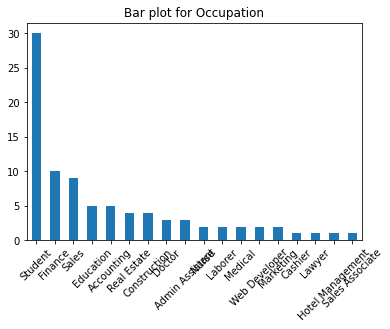

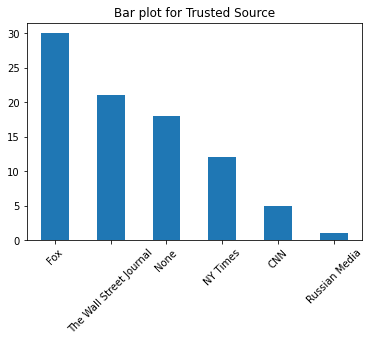

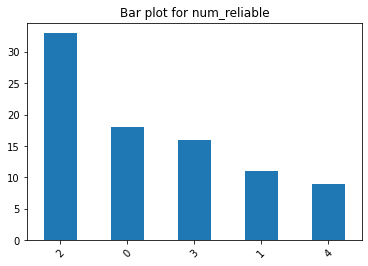

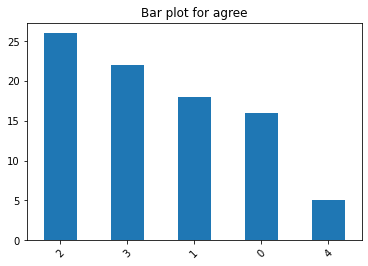

In [ ]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,4)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = news[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)
    plt.xticks(rotation=45)

#Scatter Plot for Numerical Features

(Annual Income and Age)

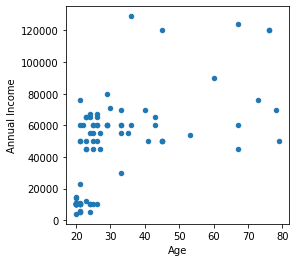

In [ ]:
fig = plt.figure(figsize=(4,4)) # define plot area
ax = fig.gca() # define axis  
news.plot.scatter(x = 'Age', y = 'Annual Income', ax = ax)

LOG(Annual Income and Age)

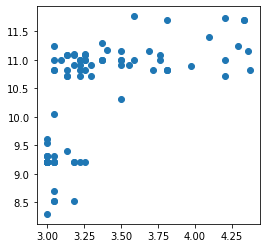

In [ ]:
x = np.log(news['Age'], dtype='float64')
y = np.log(news['Annual Income'], dtype='float64')
fig = plt.figure(figsize=(4,4)) # define plot area 
plt.scatter(x=x, y=y)

## Pearson Corrleation Tests

(Annual Income and Age)

In [ ]:
from scipy.stats import pearsonr
x = news['Age']
y = news['Annual Income']

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.601


LOG(Annual Income and Age)

In [ ]:
from scipy.stats import pearsonr
x = np.log(news['Age'], dtype='float64')
y = np.log(news['Annual Income'], dtype='float64')

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.611


## Conlusion: Both are moderately correlated

## BOX PLOTS OF CATEGORICAL COLUMNS AGAINST CONTINOUS VARIABLE AGE:

In [ ]:
# some comments
# which types of jobs for younger people vs. older

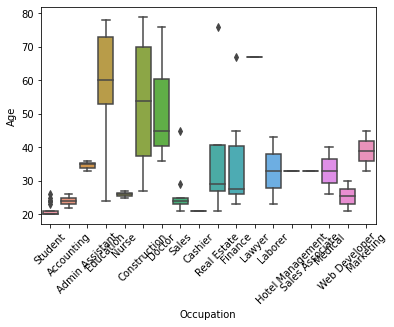

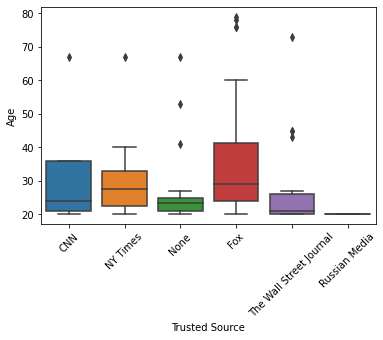

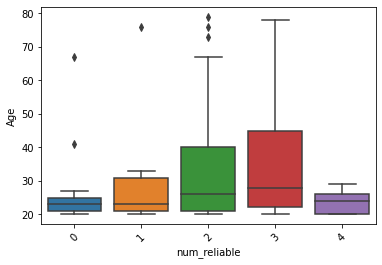

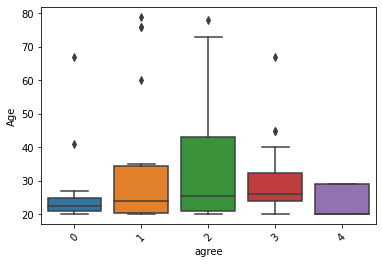

In [ ]:
for col in cat_cols:
  sns.boxplot(x=news[col], y='Age', data=news)
  plt.xlabel(col) # Set text for the x axis
  plt.xticks(rotation=45)
  plt.ylabel('Age')# Set text for y axis
  plt.show()

## BOX PLOTS OF CATEGORICAL COLUMNS AGAINST CONTINOUS VARIABLE ANNUAL INCOME:

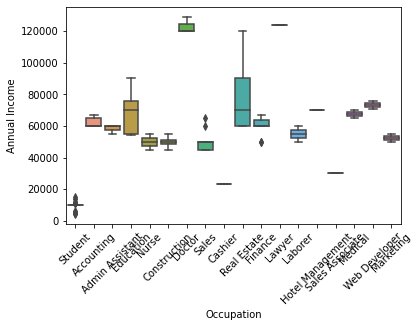

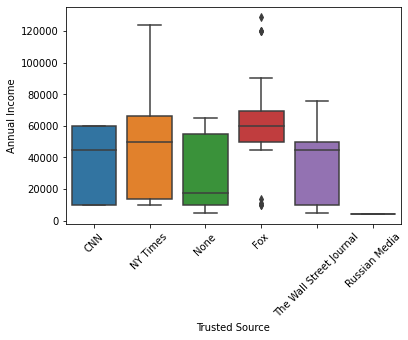

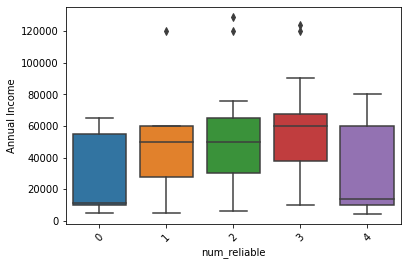

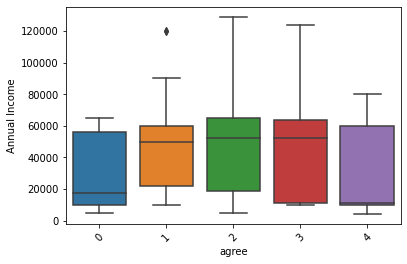

In [ ]:
for col in cat_cols:
  sns.boxplot(x=news[col], y='Annual Income', data=news)
  plt.xlabel(col) # Set text for the x axis
  plt.xticks(rotation=45)
  plt.ylabel('Annual Income')# Set text for y axis
  plt.show()

## Transforming Skewed Features

## Skewness for numerical features:

In [ ]:
num_feats = news.dtypes[news.dtypes != 'object'].index
skew_feats=news[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew': skew_feats})

skewness

,Skew
Age,1.847848
Annual Income,0.545060
num_reliable,-0.043681
agree,-0.061708


We see that Age is very right skewed. There are also two populations for Occupation, 'Student' and 'Other'.
  
  

Annual Income has gaps in the distribution. So for Annual Income there are also several populations.  

## Annual Income



Make Groups -- Mean Income by Job

In [ ]:
mean_income_by_job = news.groupby('Occupation').agg({'Annual Income':'mean'}).round(2)
mean_income_by_job = mean_income_by_job.sort_values(by='Annual Income', ascending=False).reset_index()
mean_income_by_job

,Occupation,Annual Income
0,Lawyer,124000.00
1,Doctor,123000.00
2,Real Estate,80000.00
3,Web Developer,73500.00
4,Hotel Management,70000.00
5,Education,69000.00
6,Medical,67500.00
7,Accounting,62400.00
8,Finance,59700.00
9,Admin Assistant,58333.33


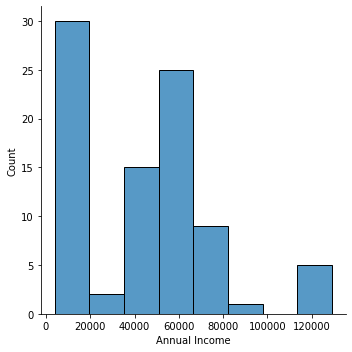

In [ ]:
sns.displot(news['Annual Income'])

 ## Annual Income: Transformation: log(Annual Income)

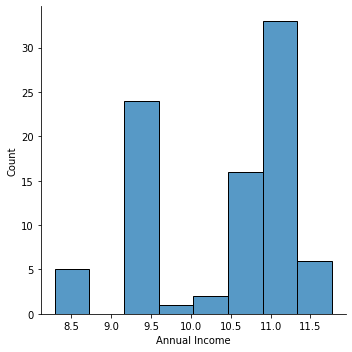

In [ ]:
income_log = np.log(news['Annual Income'])
sns.displot(data=income_log)

taking the log of ANNUAL INCOME doesn't help...

## Split Annual Income by Job into Groups



In [ ]:
under_40 = news.loc[news['Annual Income'] < 40000]
between_40_80 = news.loc[news['Annual Income'].between(40000, 80000, 'both')]
over_80 = news.loc[news['Annual Income'] > 80000]

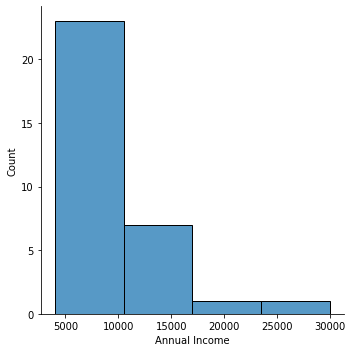

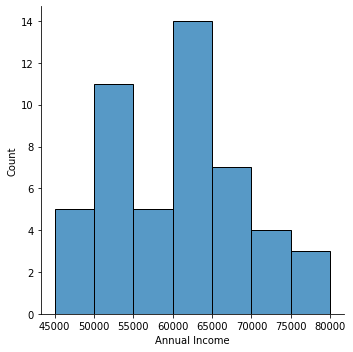

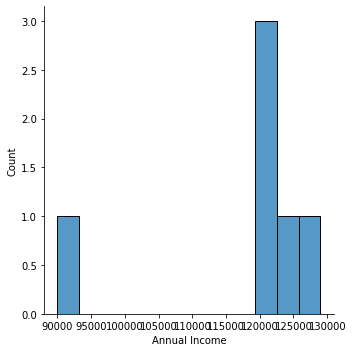

In [ ]:
sns.displot(under_40['Annual Income'], bins=4)
sns.displot(between_40_80['Annual Income'])
sns.displot(over_80['Annual Income'])

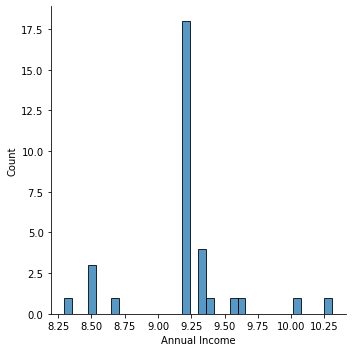

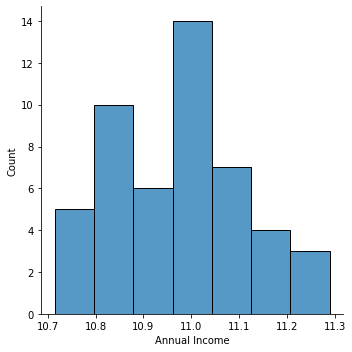

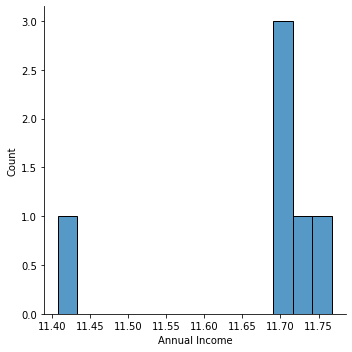

In [ ]:
under_40_log = np.log(under_40['Annual Income'])
sns.displot(data=under_40_log)

between_40_80_log = np.log(between_40_80['Annual Income'])
sns.displot(data=between_40_80_log)

over_80_log = np.log(over_80['Annual Income'])
sns.displot(data=over_80_log)

## Model Fitting

Fit a univariate distribution model for each continuous (possibly transformed) variable.  Select the best model using the AIC criteria

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Model Fitting: Annual Income -- Under 40,000

In [ ]:
# how to increase the number of points to make the curve smoother

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.98it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,6.827224e-09,1.803589e+02,-698.715732,inf,0.386884,8.028159e-05
norm,1.176714e-08,1.875813e+02,-688.226646,inf,0.320247,2.028894e-03
lognorm,3.109726e-08,2.107975e+02,-653.663021,inf,0.720356,2.290567e-17
gamma,3.513314e-08,4.901854e+04,-649.758216,1.856298,0.968750,1.368456e-48
beta,inf,inf,inf,inf,NaN,NaN


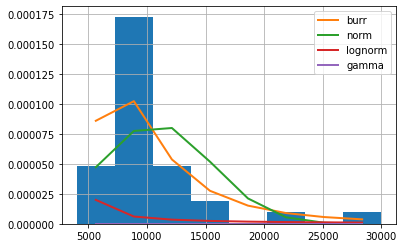

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_under_40 = under_40['Annual Income']
f_income_under_40 = Fitter(income_under_40,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=8)
f_income_under_40.fit()
f_income_under_40.summary()

In [ ]:
f_income_under_40.get_best(method = 'aic')

{'burr': {'c': 2.540189247099204,
  'd': 46.42807298647203,
  'loc': -5.327740114733151,
  'scale': 1823.0331549360062}}

## Model Fitting: Annual Income -- between 40,000 and 80,000

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  7.04it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,4.672792e-09,220.570367,-1118.917683,inf,0.187115,5.640393e-02
norm,4.766760e-09,219.245876,-1121.833910,inf,0.145577,2.269837e-01
burr,4.809612e-09,223.299082,-1113.611734,inf,0.210886,2.168157e-02
beta,5.252635e-09,222.035217,-1109.294181,inf,0.233295,7.907199e-03
lognorm,1.215422e-08,275.749948,-1072.077617,inf,0.823922,3.807849e-37


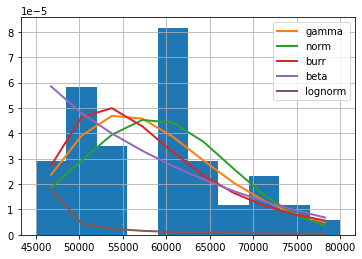

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_bet_40_80 = between_40_80['Annual Income']
f_income_bet_40_80 = Fitter(income_bet_40_80,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=10)
f_income_bet_40_80.fit()
f_income_bet_40_80.summary()

In [ ]:
f_income_bet_40_80.get_best(method = 'aic')

{'norm': {'loc': 58489.795918367345, 'scale': 8725.104406087425}}

## Model Fitting -- LOG(between 40,000 and 80,000)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,12.240176,-2.123173,-60.184093,0.299269,0.168591,0.109636
gamma,12.315863,-0.147739,-55.990215,0.301735,0.172213,0.096808
lognorm,12.363164,-0.165363,-55.802385,0.303173,0.174033,0.090849
beta,13.875896,-1.342610,-46.254404,0.285428,0.160536,0.143204
burr,13.992410,2.016503,-45.844676,0.343972,0.212155,0.020535


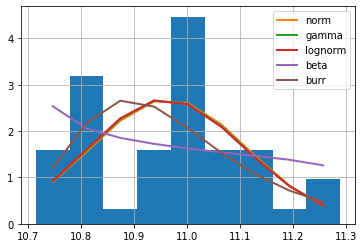

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
b = between_40_80_log.values
model = Fitter(b,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=9)
model.fit()
model.summary()

In [ ]:
model.get_best(method = 'aic')

{'norm': {'loc': 10.965571541301834, 'scale': 0.14848366325660692}}

## Model Fitting: Annual Income -- over 80,000

In [ ]:
'''
from fitter import Fitter, get_common_distributions, get_distributions
income_over_80 = over_80['Annual Income']
f_income_over_80 = Fitter(income_over_80,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"],bins=3)
f_income_over_80.fit()
f_income_over_80.summary()
'''

'\nfrom fitter import Fitter, get_common_distributions, get_distributions\nincome_over_80 = over_80[\'Annual Income\']\nf_income_over_80 = Fitter(income_over_80,\n           distributions=[\'gamma\',\n                          \'lognorm\',\n                          "beta",\n                          "burr",\n                          "norm"],bins=3)\nf_income_over_80.fit()\nf_income_over_80.summary()\n'

In [ ]:
#f_income_over_80.get_best(method = 'sumsquare_error')

## CONCLUSION: MODELS FOR AGE GROUPS WERE FOUND:   
1) Annual Income under 40,000  

2) Annual Income between 40,000 and 80,000  

3) LOG(Annual Income between 40,000 and 80,000)   

In [ ]:
# include best models


LET'S NOW DIVIDE THE GROUPS DIFFERENTLY AND TRUNCATE, HONESTLY.... AND REFORM GROUPS

## Let's divide income differently into 2 groups and truncate the rest   
Group 1: LOG(under 40,000)   
Group 2: LOG(between 40,000 and 90,000)

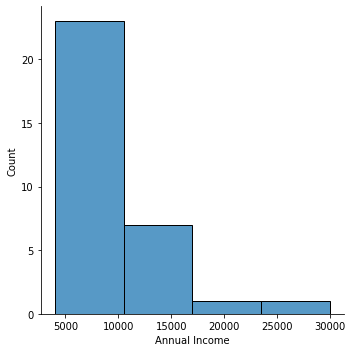

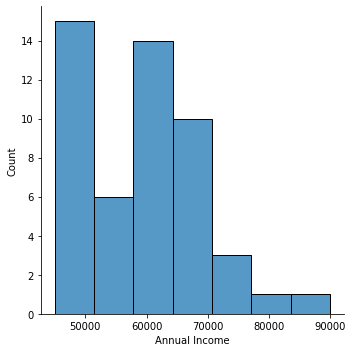

In [ ]:
under_40 = news.loc[news['Annual Income'] < 40000]
between_40_90 = news.loc[news['Annual Income'].between(40000, 90000, 'both')]

sns.displot(under_40['Annual Income'], bins=4)
sns.displot(between_40_90['Annual Income'])

Does log transformation help?

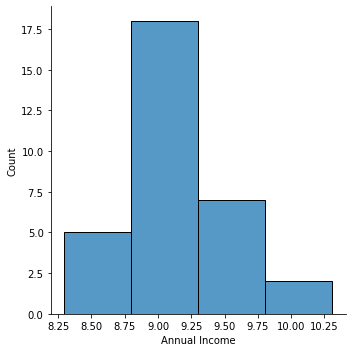

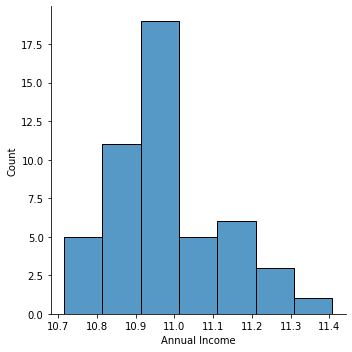

In [ ]:
under_40_log = np.log(under_40['Annual Income'])
sns.displot(data=under_40_log, bins=4)

between_40_90_log = np.log(between_40_90['Annual Income'])
sns.displot(data=between_40_90_log)

Yes it does.   
## Conclusion: truncating the income variable at 90,000 for outliers higher than this value creates a better distribution.

Let's get a model -- LOG(Annual Income under 40,000)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  8.12it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,1.608318,31.280535,-81.834562,inf,0.348554,0.000559
norm,2.447028,21.843631,-75.336103,inf,0.352437,0.000464
lognorm,2.461049,23.711609,-71.687540,inf,0.356570,0.000380
gamma,2.471165,23.651736,-71.556276,inf,0.359060,0.000336
beta,inf,inf,inf,inf,NaN,NaN


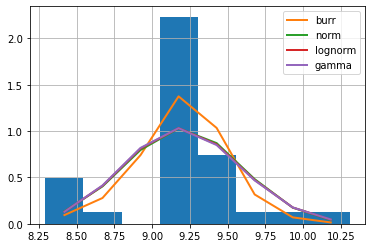

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_under_40_log = under_40_log.values
f_income_under_40_log = Fitter(income_under_40_log,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=8)
f_income_under_40_log.fit()
f_income_under_40_log.summary()

In [ ]:
f_income_under_40_log.get_best(method = 'aic')

{'norm': {'loc': 9.201917344945679, 'scale': 0.38679369533503555}}

LOG(between 40,000 and 90,000)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3.313308,5.167405,-123.967729,0.063474,0.179251,7.070703e-02
lognorm,3.338257,5.337875,-123.592639,0.064889,0.175421,8.131429e-02
burr,3.584656,6.712158,-116.119933,0.064181,0.201211,2.990207e-02
norm,3.679293,4.140710,-122.641070,0.076626,0.148915,1.967019e-01
beta,14.045943,9.687901,-47.836377,0.416780,0.378191,6.180609e-07


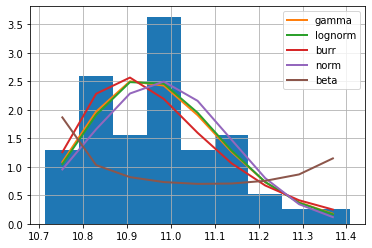

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_between_40_90 = between_40_90_log.values
f_income_between_40_90 = Fitter(income_between_40_90 ,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=9)
f_income_between_40_90.fit()
f_income_between_40_90.summary()

In [ ]:
# best model for this same group of data

In [ ]:
f_income_between_40_90.get_best(method = 'aic')

{'norm': {'loc': 10.974411409462045, 'scale': 0.1594850164574259}}

## TRUNCATING ANNUAL INCOME TO STOP AT 90,000 IS WAY BETTER FOR THE AIC AND DISTRIBUTION for the second subpopulation!!

## CONCLUSION: Models for the following group distributions were found: 
1: LOG(under 40,000)   
2: LOG(between 40,000 and 90,000) -- the model for this group of data (norm) has the lowest AIC out of other models that fit this group of data

## FINAL CONCLUSION: And in total we have found models for the following distributions for ANNUAL INCOME:
1. Annual Income under 40,000 -- BAD


> best model: burr with 180.35


2. Annual Income between 40,000 and 80,000 -- BAD


> best model: norm with 219.14


3. LOG(Annual Income between 40,000 and 80,000) -- BEST


> best model: norm with AIC -2.12


4. LOG(under 40,000) -- FINE


> best model: norm with AIC 21.84


5. LOG(between 40,000 and 90,000) -- GOOD


> best model: norm with AIC 4.14



In [ ]:
# only compare aics for the same groups

## Hypothesis tests -- STATISTICAL INFERENCE

## Statistical Inference of one variable  





## NUM_RELIABLE  
According to the news given in https://www.pewresearch.org/journalism/2019/03/26/americans-give-fairly-high-marks-to-their-local-news-media-especially-when-journalists-are-seen-as-connected-to-the-community/, about 71% of adult Americans think that the media reports news accurately. However, it is known that people usually only trust 1 or none of the sources listed out of 4 if 2 are left leaning and 2 are right leaning. (This is different from the number of sources they agree with). So, using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the true population mean for the variable NUM_RELIABLE is equal to an expected value 1.  
  
   If the p-value is smaller than alpha, we can reject the test with a level of significance alpha.   
     
  **Note: We are able to use a t-test here because of the CENTRAL LIMIT THEOREM which states that if the sample size is large enough, the sample distribution of the MEAN will always be normally distributed or APPROACH A NORMAL DISTRIBUTION. Regardless of whether the population has a normal, Poisson, binomial, or any other distribution, the sampling distribution of the mean will be normal [1].**

In [ ]:
news[['num_reliable']].agg([np.mean,np.std]).round(2)

,num_reliable
mean,1.85
std,1.24


We now examine the true population mean, which in the real world is 1, because out of 4 sources (two right leaning and two left leaning), people on average tend to trust only 1 OR 0.  
We are interested in rejecting the null hypothesis and finding statistical evidence for the alternative.

In our sample, on average, people trust 1.85 sources listed.   

This is half the number of sources listed in the survey. **We form several hypotheses.**   


> **Hypothesis 0:** True population mean is equal to the hypothesized mean of 1:   
**POPULATION MEAN MU (num_reliable_sources) = 1**


> **Hypothesis 1:** True population mean is less than the hypothesized mean of 1:  
**POPULATION MEAN MU (num_reliable_sources) < 1**   

> **Hypothesis 2:** True population mean is greater than the hypothesized population mean:   
**POPULATION MEAN MU (num_reliable_sources) > 1**  

The sample t-test formula is:


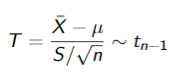

and follows approximately a t-distribution with n-1 degrees of freedom. x bar is the sample mean, u is the known mean, s is the sample standard deviation (an estimate of the population standard deviation), and n is the sample size.     
  
  Our t test also calculates a confidence interval for mu, the true (unknown) population mean, for which the formula is:

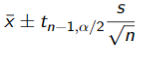

## Hypothesis 0 and Hypothesis 1

In [ ]:
# We are testing if the true means are different than the values we obtain from the news.

In [ ]:
# This is a test for the null hypothesis that the expected value (hypothesized mean) of a sample of 
# independent observations a is equal to the given (true, unknown) population mean, popmean.

In [ ]:
# is the true population mean equal to the expected value of 1?
a = news['num_reliable'].to_numpy()
stats.ttest_1samp(a=a, popmean=1, alternative='less') # defines the alternative hypothesis

Ttest_1sampResult(statistic=6.378252182095851, pvalue=0.9999999956763631)

The test is not significant. We can not reject Hypothesis 0. This also does not mean that Hypothesis 0 is true.

## Hypothesis 0 and 2

In [ ]:
# is the true population mean equal to the expected value of 1
a = news['num_reliable'].to_numpy()
stats.ttest_1samp(a=a, popmean=1, alternative='greater') # alternative hypothesis: greater

Ttest_1sampResult(statistic=6.378252182095851, pvalue=4.323636951486357e-09)

**Conclusion:**  

The first test is not significant but the second test is significant. We have p < 0.05, so when comparing H_2 and H_0, we can reject the Hypothesis 0. This implies that the mean of the true population is NOT equal to the expected value of 1. HYPOTHESIS 2 IS TRUE. The true population mean is greater than the expected value 1.

**Confidence Intervals** : Also, we see a confidence interval for the mean of this variable should be between 1.58 and 2.11. This is NOT the actual variable or its distribution. But we can conclude that 95% of samples will produce an interval that contains the true value. In other words, 95% of intervals will contain the true value.

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='num_reliable', mu=1)
print(res.summary)


One Sample t-test 

------------------  ------------
Sample size         87
Mean                 1.85057
t                    6.37825
Df                  86
p value (one-tail)   4.32364e-09
p value (two-tail)   8.64727e-09
Lower 95.0%          1.58547
Upper 95.0%          2.11568
------------------  ------------


## ANNUAL INCOME 

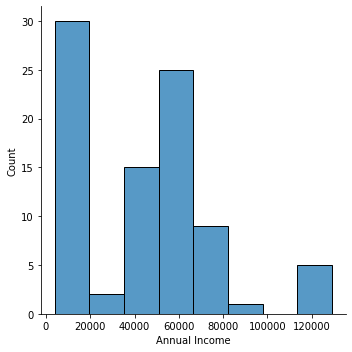

In [ ]:
sns.displot(news['Annual Income'])

It was NOT POSSIBLE to find research on income level and media trust directly (and surprisingly). The only thing I did find was the comparison between higher (or lower) education and trust in the news. Higher education is related to higher income, but they do not always imply each other. Later in the multivariate analysis, I am using this relationship between higher/lower education and trust in the media to explore a possible relationship between income and trust in the media.
  
According to the news given in https://www.pewresearch.org/journalism/2019/12/12/factors-beyond-party-affiliation-also-connect-with-trust-in-the-news-media/, an average of about 33% of people with at least a college degree (more education) say they trust the news (verses 17% of those with some college or less) [3].
   
   Here though, using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the true population mean (unknown) ANNUAL INCOME is equal to the hypothesized mean for ANNUAL INCOME for adults in the US: $54,132.

We form 3 hypotheses:

> **Hypothesis 0:**   
Population mean is equal to the hypothesized mean of 54132:   
**POPULATION MEAN MU (Annual Income) = 54132**



> **Hypothesis 1:**   
Population mean is less than the hypothesized mean of 54132:   
**POPULATION MEAN MU (Annual Income) < 54132**



> 
> **Hypothesis 2:**   
Population mean is greater than the hypothesized mean of 54132:   
**POPULATION MEAN MU (Annual Income) > 54132**




In [ ]:
news[['Annual Income']].agg([np.mean,np.std]).round(2)

,Annual Income
mean,44965.52
std,31099.78


## Hypothesis 0 and 1

In [ ]:
# is the true population mean equal to the expected value?
a = news['Annual Income'].to_numpy()
stats.ttest_1samp(a=a, popmean=54132, alternative='less')

Ttest_1sampResult(statistic=-2.749191550582362, pvalue=0.0036401082704117455)

Okay, the test is significant. It looks like we can reject the null hypothesis. The true population mean is NOT equal to the expected value of 54,132. Because we can reject Hypothesis 0, this implies Hypothesis 1 WHEN COMPARING H0 anad H1.

## Hypothesis 0 and 2

In [ ]:
# is the true population mean equal to the expected value for the mean?
a = news['Annual Income'].to_numpy()
stats.ttest_1samp(a=a, popmean=54132, alternative='greater')

Ttest_1sampResult(statistic=-2.749191550582362, pvalue=0.9963598917295883)

The test is not significant, so we can not say anything when comparing Hypothesis 0 and 2.




**CONCLUSION:** **Hypohesis 1 is valid. The true population mean is something less than the expected value of 54132.**

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='Annual Income', mu=54132)
print(res.summary)


One Sample t-test 

------------------  --------------
Sample size            87
Mean                44965.5
t                      -2.74919
Df                     86
p value (one-tail)      0.00364011
p value (two-tail)      0.00728022
Lower 95.0%         38337.3
Upper 95.0%         51593.8
------------------  --------------


**Confidenece Interval:**  It appears that a confidence interval for the mean of this variable should be between about 38,337 USD and 51,593 USD, **meaning that 95% of samples will produce an interval that contains the true value. In other words, 95% of intervals will contain the true value.**

## AGREE  
According to the news given in https://www.pewresearch.org/fact-tank/2021/08/30/partisan-divides-in-media-trust-widen-driven-by-a-decline-among-republicans/, AND from what we know already, most people agree with 2 sources out of 4 listed if 2 are from the right and 2 are from the left.   
  
  Using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the true population mean is equal to or smaller than the hypothesized mean (expected value) for the variable AGREE.

  We can do this because of the CENTRAL LIMIT THEOREM which states that if the sample size is large enough, the sample distribution of the MEAN will always be normally distributed or APPROACH A NORMAL DISTRIBUTION.
  
   If the p-value is smaller than alpha, we can reject the test with a level of significance alpha.

In [ ]:
news[['agree']].agg([np.mean,np.std]).round(2)

,agree
mean,1.79
std,1.18


In our sample, on average, people agree with 1.79 sources listed in the sample.   

**We form two hypotheses.**   


> **Hypothesis 0:** Population mean is equal to the hypothesized mean of 2:   
**POPULATION MEAN MU (agree) = 2**




> **Hypothesis 1:** Population mean is less than the hypothesized mean of 2:   
**POPULATION MEAN MU (agree) < 2**  


>**Hypothesis 2:** Population mean is greater than the hypothesized mean of 2:   
**POPULATION MEAN MU (agree) > 2**



We examine the true population mean, which in the real world is 2, because out of 4 sources (two right leaning and two left leaning), people on average tend to AGREE with the 2 that align with their political options.  
We are interested in rejecting the null hypothesis and finding statistical evidence for the alternative.

## Hypothesis 0 and 1

In [ ]:
# is the true population mean equal to the expected value for the mean of this variable?
a = news['agree'].to_numpy()
stats.ttest_1samp(a=a, popmean=2, alternative='less')

Ttest_1sampResult(statistic=-1.6318223054907808, pvalue=0.05318680118040103)

P is exactly equal to 0.053. The test could be considered significant, or it could be ruled out. For now, we will consider it insignificant, since it is not quite equal to 0.05000. However, we may want to consider it significant, because when comparing H1 and H2, the test is not significant.

# Hypothesis 1 and 2

In [ ]:
# is the true population mean equal to the expected value ?
a = news['agree'].to_numpy()
stats.ttest_1samp(a=a, popmean=2, alternative='greater')

Ttest_1sampResult(statistic=-1.6318223054907808, pvalue=0.9468131988195989)

The test is not significant. We can not reject Hypothesis 1, which also doesn't make it true either. We can not say anything about Hypothesis 2.

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='agree', mu=2)
print(res.summary)


One Sample t-test 

------------------  ----------
Sample size         87
Mean                 1.7931
t                   -1.63182
Df                  86
p value (one-tail)   0.0531868
p value (two-tail)   0.106374
Lower 95.0%          1.54106
Upper 95.0%          2.04515
------------------  ----------


**Confidence Interval:** An appropriate confidence interval for the mean of this variable is (1.54, 2.04). **meaning that 95% of samples will produce an interval that contains the true value. In other words, 95% of intervals will contain the true value.**

## AGE

According to the National Census Bureau, the average age in the US is 38.8 years old.
  
  Using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the true population mean is equal to he expected value for the mean AGE. We will assume that AGE, again, follows a normal distribution with unknown variance, just like we have for the last three variables.   

  We can do this because of the CENTRAL LIMIT THEOREM which states that if the sample size is large enough, the sample distribution of the MEAN will always be normally distributed or APPROACH A NORMAL DISTRIBUTION.
  
  Again, if the p-value is smaller than alpha, we can reject the test with a level of significance alpha.

** Hypothesis 0:** Population mean is equal to the hypothesized mean of 38.8:   
**POPULATION MEAN MU (Age) = 38.8**  
  
  ** Hypothesis 1:** Population mean is less than the hypothesized mean of 38.8:   
**POPULATION MEAN MU (Age) < 38.8**  
  
  ** Hypothesis 2:** Population mean is greater than the hypothesized mean of 38.8:   
**POPULATION MEAN MU (Age) > 38.8**

In [ ]:
news[['Age']].agg([np.mean,np.std])

,Age
mean,31.241379
std,15.731738


## Hypothesis 0 and 1

In [ ]:
# is the true population mean equal to the expected value for the mean of this variable?
a = news['Age'].to_numpy()
stats.ttest_1samp(a=a, popmean=38.8, alternative='less')

Ttest_1sampResult(statistic=-4.481521479865284, pvalue=1.1355640190743495e-05)

Okay, this test is definitely significant. We can reject Hypothesis 0 which implies Hypothesis 1. In other words, yes. The sample mean is less than the true population mean.

## Hypothesis 0 and 2

In [ ]:
a = news['Age'].to_numpy()
stats.ttest_1samp(a=a, popmean=38.8, alternative='greater')

Ttest_1sampResult(statistic=-4.481521479865284, pvalue=0.9999886443598093)

This test is not significant.

**Conclusion: Hypothesis 1 seems to be correct.**

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='Age', mu=38.8)
print(res.summary)


One Sample t-test 

------------------  ------------
Sample size         87
Mean                31.2414
t                   -4.48152
Df                  86
p value (one-tail)   1.13556e-05
p value (two-tail)   2.27113e-05
Lower 95.0%         27.8885
Upper 95.0%         34.5943
------------------  ------------


**Confidence Interval:** So, 95% of samples will produce an interval that contains the true value. In other words, 95% of intervals will contain the true value. The true value of the true population mean for this variable (Age) will be found between 27.88 and 34.59 (?).

## Hypothesis tests -- STATISTICAL INFERENCE

## Statistical Inference of two variables  


**In this section I will explore the dependence between certain variables and the following questions:**  
   
1) Is Age related to Annual Income?  
2) Is num_reliable related to Annual Income?  
3) Does occupation influence trust?   
4) Does occupation influence agreement?  
5) Does occupation influence agreement with certain news channels? (occupation, Trusted Source)

*Perform interesting hypothesis test based on two variables.   
 These can be different depending on yourdata.    
 For example, you may want to test if two categorical variables are related to one another.   
  Oryou may want to compare if there are statistical differences in the mean of two (or more) populations.  
  In case you have two paired continuous variables, you may want to test if there exist significant linearcorrelation between them.*

## Statistical Testing

Inference methods for two qualitative variables:   

contingency table  
Chi-square distribution 
  
    
Methods for two quantitative (continous):  
correlation  
mean comparison  
regression


## Two continuous variables

## 1) Is Age related to Annual Income ?

## Correlation
Although a pearson correlation matrix only measures linear correlation, we will look at it here anyways because both of the variables are continuous:

In [ ]:
# choose two variables maybe age and income and perform a pearson correlation TEST

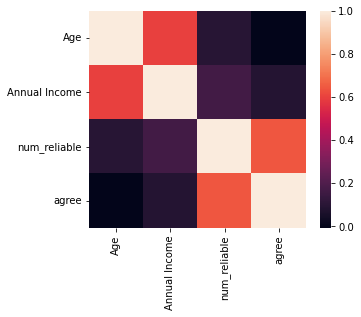

In [ ]:
corrmat = news.corr(method='pearson')
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

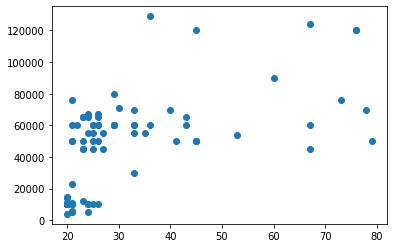

In [ ]:
# Is Age related to Annual Income
x = news['Age']
y = news['Annual Income']
plt.scatter(x,y)
plt.show()

In [ ]:
# check the log... could have a more linear relationship
# a polynomial function

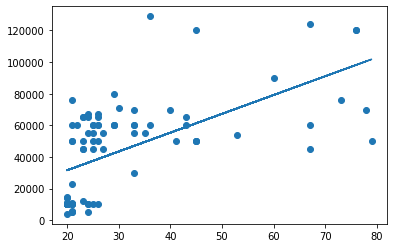

In [ ]:
slope, intercept, r, p, std_error = stats.linregress(x,y)


# get new values the represent where on the y axis the corresponding x value is placed
def myfunc(x):
  return slope * x + intercept

# run each x through the funcion, will result in news array w/ new vals for y axis
mymodel = list(map(myfunc, x))

plt.scatter(x,y)
plt.plot(x, mymodel) # draw regression line
plt.show()

In [ ]:
print(slope, intercept, r, p, std_error)

1189.0530981767047 7817.858381100188 0.6014791717043076 7.238485924868574e-10 171.2999958791366


Correlation coefficient r = 0.6 tells us that there is quite a relationship between these two variables, although there is also lots of variation. It's not perfect but indicates that we could use linear regression to predict future values, and that there is also a slightly linear upward trend between Age and Income.

## One qualitative and one quantitative

ANOVA (Analysis of Variance) checks if the means of two or more groups are significantly different from each other. It checks the impact of one or more factors by comparing the means of different samples.

# 2) Is num_reliable related to Annual Income?




IF THE MEAN OF THE INCOME IS DIFFERENT FOR THE NUMBER OF SOURCES YOUR REPLY ON. IN OTHER WORDS DOES INCOME AFFECT NUMBER OF RELIABLE SOURCES

  

Use a one-way **ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable**. The independent variable should have at least three levels  
  
  RETURNS:  

>   f1 score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption and reports it as the F-test score. A larger score means there is a larger difference between the means.

> p-value: P-value tells how statistically significant our calculated score value is.

Variance is the measurement of the spread between numbers in a variable. It measures how far a number is from the mean and every number in a variable.

The **variance of a feature determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response** and vice-versa.

One Way ANOVA tests the relationship between categorical predictor vs continuous response.  

1. Here we will check whether there is equal variance between groups of categorical feature wrt continuous response.  

2. If there is equal variance between groups, it means this feature has no impact on response and it can not be considered for model training.

**Try an ANOVA test to examnie if the means of income of the different responses to num_reliable are different.**  
> H0: All levels or groups in num_reliable have equal mean


> H1: At least one group's mean is different.

In [ ]:
grouped = news[["num_reliable", "Annual Income"]].groupby(["num_reliable"])
grouped.head(2)

,num_reliable,Annual Income
0,2,10000
1,3,15000
2,2,10000
3,0,60000
6,0,55000
7,4,4000
9,1,120000
11,3,90000
17,1,50000
28,4,65000


In [ ]:
grouped.get_group(0)["Annual Income"]

3     60000
6     55000
10    55000
13    10000
14    11000
15    23000
22    10000
35    65000
40    10000
44    60000
47    12000
57    11000
65    50000
68    10000
69     5000
70    60000
76     5000
84    10000
Name: Annual Income, dtype: int64

In [ ]:
# include the box plot
# include the ANOVA table

In [ ]:
# ANOVA
from scipy.stats import f_oneway
f_val, p_val = f_oneway(grouped.get_group(0)["Annual Income"], 
                        grouped.get_group(1)["Annual Income"], 
                        grouped.get_group(2)["Annual Income"],
                        grouped.get_group(3)["Annual Income"],
                        grouped.get_group(4)["Annual Income"])
print("ANOVA results: F=", f_val, ", P=", p_val)

ANOVA results: F= 2.3644394697420847 , P= 0.059654753414701896


Our p value indicates that the test very close to significant. But we will consider it not, because p is not less than or equal to 0.05. It is actaully a bit more. So we can not reject the null hypothesis that all levels or groups in num_reliable have equal mean. This also doesn't mean that they do not.

## COMPLETE ANOVA TABLE

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

annual_income = news['Annual Income']
model = ols('annual_income ~ C(num_reliable)', data=news).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(num_reliable),8.601631e+09,4.0,2.364439,0.059655
Residual,7.457727e+10,82.0,NaN,NaN


In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(num_reliable),8.601631e+09,4.0,2.150408e+09,2.364439,0.059655,0.103411,0.05903
Residual,7.457727e+10,82.0,9.094789e+08,NaN,NaN,NaN,NaN


## Multiple Mean Comparison

In [ ]:
# FWER = familywise error rate (value of alpha)
# group 1 and 2 for groups compared
# p-adj is the adjusted p value taking into account the multiple comparisons
# lower = lower band of the confidence interval
# reject is the decision rule based on the corrected p-value

import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(news['num_reliable'], news['Annual Income'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
4000,5000,-3.6667,0.6128,-9.1082,1.7749,False
4000,6000,-2.0,0.9,-8.6645,4.6645,False
4000,10000,-2.2222,0.9,-7.0639,2.6194,False
4000,11000,-2.75,0.9,-8.0187,2.5187,False
4000,12000,-4.0,0.785,-10.6645,2.6645,False
4000,14000,0.0,0.9,-6.6645,6.6645,False
4000,15000,-1.0,0.9,-7.6645,5.6645,False
4000,23000,-4.0,0.785,-10.6645,2.6645,False
4000,30000,-2.0,0.9,-8.6645,4.6645,False
4000,45000,-2.0,0.9,-7.1623,3.1623,False


In [ ]:
# using variance to test mean equality

## Two qualitative variables

## 3) Does occupation influence trust?  
To examine this relationship I will use a chi-square test. This method is used to make an assumption about the distribution of a variable or to decide if a relationship between 2 variabes exists. When performing this test, an X^2 distribution curve is formed, which directly depends on the **number of degrees of freedom.** This is how an inference is able to be made.  


> Hypothesis 0: Num_reliable and Occupation have no relationship.


> Hypothesis 1: Num_reliable and Occupation have a relationship.

Degrees of freedom for X^2 independence test statistics = (# rows-1)*(# columns-1)  
  
  So if Hypothesis 0 is true, the statistic will approximate a Chi-square distribution with (# rows-1)*(# columns-1) degress of freedom, if the sample size is large enough. 





In [ ]:
# CHI SQUARE TEST
# two qualitative
# create contingency table
data_crosstab = pd.crosstab(news['Occupation'],
                            news['num_reliable'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = news['Occupation'].unique()
columns = news['num_reliable'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 74.71527777777779  and p value is: 0.2693935265817633
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 74.71527777777779  and critical value is: 88.25016442187412
Failed to reject the null hypothesis.


We have failed to reject the null hypothesis in both cases. But again, this doesn't mean we can find evidence for Hypothesis 1. And THIS fact doesn't mean there is evidence that Hypothesis 0 is true either, as we have seen from the test. It is not significant.

## Observed Frequencies

In [ ]:
data_crosstab

num_reliable,0,1,2,3,4,Total
Occupation,,,,,,
Accounting,2,0,0,1,2,5
Admin Assistant,0,1,1,1,0,3
Cashier,1,0,0,0,0,1
Construction,2,0,2,0,0,4
Doctor,0,1,1,1,0,3
Education,0,0,3,2,0,5
Finance,2,3,4,1,0,10
Hotel Management,0,0,1,0,0,1
Laborer,0,0,0,2,0,2


## Expected frequencies
(are all less than 5)

In [ ]:
# chi square value
# p-value
# degrees of freedom
# expected frequencies as an array
results = stats.chi2_contingency(data_crosstab)
results
expected_frequencies = pd.DataFrame(results[3],columns=['0','1','2','3','4','total'],index=data_crosstab.index)
expected_frequencies

,0,1,2,3,4,total
Occupation,,,,,,
Accounting,1.034483,0.632184,1.896552,0.919540,0.517241,5.0
Admin Assistant,0.620690,0.379310,1.137931,0.551724,0.310345,3.0
Cashier,0.206897,0.126437,0.379310,0.183908,0.103448,1.0
Construction,0.827586,0.505747,1.517241,0.735632,0.413793,4.0
Doctor,0.620690,0.379310,1.137931,0.551724,0.310345,3.0
Education,1.034483,0.632184,1.896552,0.919540,0.517241,5.0
Finance,2.068966,1.264368,3.793103,1.839080,1.034483,10.0
Hotel Management,0.206897,0.126437,0.379310,0.183908,0.103448,1.0
Laborer,0.413793,0.252874,0.758621,0.367816,0.206897,2.0


**Cramer's V coefficient**  

Cramer’s V is a measure of the strength of association (or dependence) between two categorical variables.  
It ranges from 0 to 1 where:  
0 indicates no association  
1 indicates total association

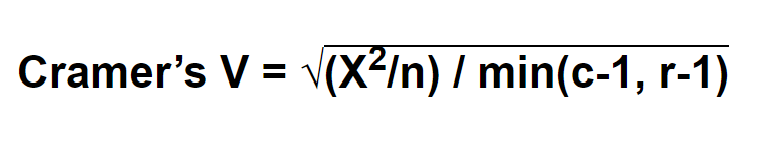

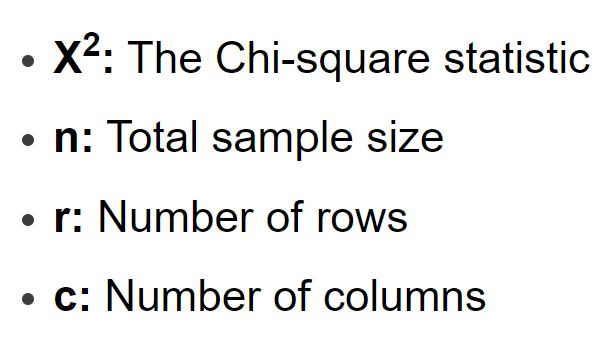

In [ ]:
# if unable to reject, not useful to compute this coefficient

In [ ]:
# the crosstable should include both variables
# cross table of expected frequencies vs table of observed frequencies
# if the variables are independent

## 4) Does occupation influence agreement?


> Hypothesis 0: The two variables have no relationship.


> Hypothesis 1: The two variables have a relationship.



In [ ]:
# CHI SQUARE TEST
# two qualitative
# create contingency table
data_crosstab = pd.crosstab(news['Occupation'],
                            news['agree'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = news['Occupation'].unique()
columns = news['agree'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 75.97458268583266  and p value is: 0.23716738582727404
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 75.97458268583266  and critical value is: 88.25016442187412
Failed to reject the null hypothesis.


This test is not significant either. Our p value is too high. We have failed to reject the null hypothesis.  
But we can still look at Cramer's coefficient with takes values in the interval (0,1) such that values closer to one indicate strong relationship between the variables [5].

## Observed Frequencies

In [ ]:
data_crosstab

agree,0,1,2,3,4,Total
Occupation,,,,,,
Accounting,2,1,2,0,0,5
Admin Assistant,0,2,0,1,0,3
Cashier,1,0,0,0,0,1
Construction,2,1,1,0,0,4
Doctor,0,1,1,1,0,3
Education,0,1,3,1,0,5
Finance,2,1,3,4,0,10
Hotel Management,0,0,1,0,0,1
Laborer,0,0,2,0,0,2


## Expected Frequencies

In [ ]:
# chi square value
# p-value
# degrees of freedom
# expected frequencies as an array
results = stats.chi2_contingency(data_crosstab)
expected_frequencies = pd.DataFrame(results[3],columns=['0','1','2','3','4','total'],index=data_crosstab.index)
expected_frequencies

,0,1,2,3,4,total
Occupation,,,,,,
Accounting,0.919540,1.034483,1.494253,1.264368,0.287356,5.0
Admin Assistant,0.551724,0.620690,0.896552,0.758621,0.172414,3.0
Cashier,0.183908,0.206897,0.298851,0.252874,0.057471,1.0
Construction,0.735632,0.827586,1.195402,1.011494,0.229885,4.0
Doctor,0.551724,0.620690,0.896552,0.758621,0.172414,3.0
Education,0.919540,1.034483,1.494253,1.264368,0.287356,5.0
Finance,1.839080,2.068966,2.988506,2.528736,0.574713,10.0
Hotel Management,0.183908,0.206897,0.298851,0.252874,0.057471,1.0
Laborer,0.367816,0.413793,0.597701,0.505747,0.114943,2.0


## 5) Does occupation influence agreement with a certain Trusted Source?  

> Hypothesis 0: The two variables have no relationship.


> Hypothesis 1: The two variables have a relationship.

In [ ]:
# CHI SQUARE TEST
# two qualitative
# create contingency table
data_crosstab = pd.crosstab(news['Occupation'],
                            news['Trusted Source'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = news['Occupation'].unique()
columns = news['Trusted Source'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 85.900992063492  and p value is: 0.45225147085751005
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 85.900992063492  and critical value is: 107.52174097071946
Failed to reject the null hypothesis.


The test is not significant. The p value is too large just like the other cases. We can not reject the null hypothesis, which does not imply that it is true either. We also can not say anything about Hypothesis 1.

## Observed Frequencies

In [ ]:
data_crosstab

Trusted Source,CNN,Fox,NY Times,None,Russian Media,The Wall Street Journal,Total
Occupation,,,,,,,
Accounting,0,3,0,2,0,0,5
Admin Assistant,1,2,0,0,0,0,3
Cashier,0,0,0,1,0,0,1
Construction,1,1,0,2,0,0,4
Doctor,0,3,0,0,0,0,3
Education,0,2,0,1,0,2,5
Finance,0,3,1,2,0,4,10
Hotel Management,0,1,0,0,0,0,1
Laborer,0,2,0,0,0,0,2


## Expected Frequencies

In [ ]:
# chi square value
# p-value
# degrees of freedom
# expected frequencies as an array
results = stats.chi2_contingency(data_crosstab)
expected_frequencies = pd.DataFrame(results[3], columns=data_crosstab.columns, index=data_crosstab.index)
#,columns=['0','1','2','3','4','total'],index=data_crosstab.index)
expected_frequencies

Trusted Source,CNN,Fox,NY Times,None,Russian Media,The Wall Street Journal,Total
Occupation,,,,,,,
Accounting,0.287356,1.724138,0.689655,1.034483,0.057471,1.206897,5.0
Admin Assistant,0.172414,1.034483,0.413793,0.620690,0.034483,0.724138,3.0
Cashier,0.057471,0.344828,0.137931,0.206897,0.011494,0.241379,1.0
Construction,0.229885,1.379310,0.551724,0.827586,0.045977,0.965517,4.0
Doctor,0.172414,1.034483,0.413793,0.620690,0.034483,0.724138,3.0
Education,0.287356,1.724138,0.689655,1.034483,0.057471,1.206897,5.0
Finance,0.574713,3.448276,1.379310,2.068966,0.114943,2.413793,10.0
Hotel Management,0.057471,0.344828,0.137931,0.206897,0.011494,0.241379,1.0
Laborer,0.114943,0.689655,0.275862,0.413793,0.022989,0.482759,2.0


This ends our statistical testing for 2 variables.



## Final Remarks:


References:  
[1] scribbr.com/statistics/central-limit-theorem/#:~:text=The%20central%20limit%20theorem%20says,the%20mean%20will%20be%20normal  

[2] https://www.reneshbedre.com/blog/ttest.html    

[3] https://www.pewresearch.org/journalism/2019/12/12/factors-beyond-party-affiliation-also-connect-with-trust-in-the-news-media/  
[4] https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626  
[5] https://aulaglobal.uc3m.es/pluginfile.php/5788186/mod_resource/content/5/T3Inference.pdf

[6] https://www.statology.org/cramers-v-in-python/

[7] https://www.pewresearch.org/fact-tank/2021/08/30/partisan-divides-in-media-trust-widen-driven-by-a-decline-among-republicans/  

[8] https://www.pewresearch.org/journalism/2019/03/26/americans-give-fairly-high-marks-to-their-local-news-media-especially-when-journalists-are-seen-as-connected-to-the-community/

[9]  https://today.yougov.com/topics/politics/articles-reports/2022/04/05/trust-media-2022-where-americans-get-news-poll